In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [5]:
df = pd.read_csv('Orignal Reviews Dataset.csv')

In [6]:
df

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Status
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought sever vital can dog food product found ...,OR
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arriv label jumbo salt peanutsth peanu...,OR
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confect around centuri light pillowi citru gel...,OR
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,look secret ingredi robitussin believ found go...,OR
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffi great price wide assort yummi taff...,OR
...,...,...,...,...,...,...,...,...,...,...,...,...
48386,49995,49996,B00430B73W,AKW867T7C6HF8,HWJ3,0,0,5,1261180800,Grown to really like them,sister introduc becom favorit carri around pic...,OR
48387,49996,49997,B00430B73W,A2PEHNEDMHOYTW,L. Allen,0,0,5,1258934400,Healthy Snack at a great price!,friend recommend bar fell love great price esp...,OR
48388,49997,49998,B00430B73W,A2QH2KF2IAB143,"J. A. Meyers ""Jan""",0,0,5,1257379200,Raw Revolution Hazelnut Cashew,fabul take one work everi day feel depriv with...,OR
48389,49998,49999,B00430B73W,AMX286UGXISMA,Aaron Dragushan,0,0,4,1247702400,"fantastic, but chew carefully",love bar continu buy bewar occasion contain sm...,OR


In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
columns_to_keep = ['ProductId','Score','Text']
prod_df = df[columns_to_keep].copy()

In [9]:
def allreviews():
    return prod_df

In [10]:
def specific_prod_reviews(prod_no):
    unique_value_counts = prod_df['ProductId'].value_counts()
    unique_value_counts
    unique_values = df['ProductId'].unique() # To get all product ids
    unique_values_list = unique_value_counts.index.tolist() #sorts productid according to maximum no of reviews
    for i in unique_values:
        target_value = unique_values_list[prod_no-1]
        target_column = 'ProductId'
        prod1_df = prod_df[prod_df[target_column] == target_value].copy()
        
    return prod1_df

In [11]:
def reviews_according_to_stars(star,prod_no):
    prod1_df=specific_prod_reviews(prod_no)
    for i in prod1_df.itertuples(index=False):
        target_value = star
        target_column = 'Score'
        prod1_star_df = prod1_df.loc[prod1_df[target_column] == target_value].copy()
    return prod1_star_df

In [24]:
def sentiment_analysis(prod_no):
    prod1_df=specific_prod_reviews(prod_no)
    reviews = prod1_df['Text']
    dfs_to_concatenate=[]
    sia = SentimentIntensityAnalyzer()
    for review in reviews:
        sentiment_score = sia.polarity_scores(review)['compound']
        if sentiment_score >= 0.05:
            sentiment = "Positive"
        elif sentiment_score <= -0.05:
            sentiment = "Negative"
        else:
            sentiment = "Neutral"
        review=review
        sentiment=sentiment
        sentiment_score=sentiment_score
        Generated_Rating= 1 + 4 * (sentiment_score + 1) / 2
        current_df = pd.DataFrame({'Reviews': [review], 'Sentiments': [sentiment], 'Sentiment_score': [sentiment_score], 'Generated_Rating': [Generated_Rating]})
        dfs_to_concatenate.append(current_df)
    df = pd.concat(dfs_to_concatenate, ignore_index=True)
    
    return df

In [13]:
def Positive_sentiment(prodno):
    prod1_sentiment_df=sentiment_analysis(prodno)
    specific_value = 'Positive' 
    filter_column = 'Sentiments'
    Positive_sentiment_df = prod1_sentiment_df[prod1_sentiment_df[filter_column] == specific_value]
    return Positive_sentiment_df
    
def Negative_sentiment(prodno):
    prod1_sentiment_df=sentiment_analysis(prodno)
    specific_value = 'Negative' 
    filter_column = 'Sentiments'
    Negative_sentiment_df = prod1_sentiment_df[prod1_sentiment_df[filter_column] == specific_value]
    return Negative_sentiment_df
    
def Neutral_sentiment(prodno):
    prod1_sentiment_df=sentiment_analysis(prodno)
    specific_value = 'Neutral' 
    filter_column = 'Sentiments'
    Neutral_sentiment_df = prod1_sentiment_df[prod1_sentiment_df[filter_column] == specific_value]
    return Neutral_sentiment_df

In [14]:
def count_graph(prod_no):
    df = specific_prod_reviews(prod_no)
    plt.figure(figsize=(8, 6))
    ax=sns.countplot(x='Score', data=df,)
    # Add count annotations to each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    plt.xlabel('Ratings')
    plt.ylabel('Count')
    plt.title('Graph for Product')
    plt.show()

In [15]:
def pie_graph(prod_no):
    explode = [0.03,0,0.1,0,0] # To slice the perticuler section
    colors = ["c", 'b','r','y','g'] # Color of each section
    textprops = {"fontsize":10}
    df = specific_prod_reviews(prod_no)
    unique_value_counts = df['Score'].value_counts()
    unique_values = df['Score'].unique() 
    plt.pie(unique_value_counts,labels=unique_values,explode = explode, colors =colors, autopct = "%0.2f%%",shadow = True, radius = 1.4,textprops=textprops)
    plt.title('Graph for Product')
    plt.show()

In [22]:
allreviews()

,ProductId,Score,Text
0,B001E4KFG0,5,bought sever vital can dog food product found ...
1,B00813GRG4,1,product arriv label jumbo salt peanutsth peanu...
2,B000LQOCH0,4,confect around centuri light pillowi citru gel...
3,B000UA0QIQ,2,look secret ingredi robitussin believ found go...
4,B006K2ZZ7K,5,great taffi great price wide assort yummi taff...
...,...,...,...
48386,B00430B73W,5,sister introduc becom favorit carri around pic...
48387,B00430B73W,5,friend recommend bar fell love great price esp...
48388,B00430B73W,5,fabul take one work everi day feel depriv with...
48389,B00430B73W,4,love bar continu buy bewar occasion contain sm...


In [23]:
prodno=1
specific_prod_reviews(prodno)

,ProductId,Score,Text
20284,B002QWP89S,5,year old shelti chronic brochot med three year...
20285,B002QWP89S,5,genuin greeni product knockoff dog love favori...
20286,B002QWP89S,5,dog love greeni cours doggi dont bought dashch...
20287,B002QWP89S,5,say dog love greeni begg time alway sit cupboa...
20288,B002QWP89S,5,review box greeni lite dog packag came quickli...
...,...,...,...
20876,B002QWP89S,5,make sure small dogbig dog might choke get anx...
20877,B002QWP89S,5,best thing sinc slice bread give dog treat qui...
20878,B002QWP89S,5,dog love receiv sampl vet offic got puppi love...
20879,B002QWP89S,5,oh gosh without greeni hous unhappi doggi seem...


In [25]:
star=3
prodno=2
reviews_according_to_stars(star,prodno)

,ProductId,Score,Text
29661,B007M83302,3,tast like potato stix got grade school lunch u...
29683,B007M83302,3,chip unusu grow tast like shoestr potato boder...
29693,B007M83302,3,love tast popchip think littl salti manufactur...
29702,B007M83302,3,tri bbq first pleasantli surprisedbr br alway ...
29724,B007M83302,3,order chip regular basi like portion one bag p...
29741,B007M83302,3,chip still light crispi flavor nice littl kick...
29752,B007M83302,3,local store run special decid give tri ok dont...
29753,B007M83302,3,realli like pop chip flavor isnt best expect t...
29763,B007M83302,3,love pop chip oder varieti pack howev flavor v...
29770,B007M83302,3,popchip tast smell horribl let enjoy variou fl...


In [27]:
prod_no=2
sentiment_analysis(prod_no)

,Reviews,Sentiments,Sentiment_score,Generated_Rating
0,popchip bomb use parmesan garlic scoop cottag ...,Positive,0.1531,3.3062
1,like puf natur chip make uniqu chip market ord...,Positive,0.9442,4.8884
2,love chip alway big fan potato chip havent one...,Positive,0.9705,4.9410
3,tast like potato stix got grade school lunch u...,Positive,0.3818,3.7636
4,chip great look almost like flatten rice cake ...,Positive,0.8524,4.7048
...,...,...,...,...
551,love potato chip could eat bag thank power wou...,Positive,0.9898,4.9796
552,popchip realli hard find order case amazon reg...,Positive,0.8683,4.7366
553,much healthi altern chip tast great great crun...,Positive,0.8793,4.7586
554,good ive start get automat like origin flavor ...,Positive,0.6597,4.3194


In [28]:
prodno=1
Positive_sentiment(prodno)

,Reviews,Sentiments,Sentiment_score,Generated_Rating
0,year old shelti chronic brochot med three year...,Positive,0.9274,4.8548
1,genuin greeni product knockoff dog love favori...,Positive,0.9670,4.9340
2,dog love greeni cours doggi dont bought dashch...,Positive,0.9524,4.9048
3,say dog love greeni begg time alway sit cupboa...,Positive,0.6369,4.2738
5,highli recommend chew dog exactli say freshen ...,Positive,0.2023,3.4046
...,...,...,...,...
592,make sure small dogbig dog might choke get anx...,Positive,0.8580,4.7160
593,best thing sinc slice bread give dog treat qui...,Positive,0.9477,4.8954
594,dog love receiv sampl vet offic got puppi love...,Positive,0.9545,4.9090
595,oh gosh without greeni hous unhappi doggi seem...,Positive,0.9136,4.8272


In [29]:
prodno=2
Negative_sentiment(prodno)

,Reviews,Sentiments,Sentiment_score,Generated_Rating
17,chip good know theyr bad make eat danger time ...,Negative,-0.7437,1.5126
67,light crispi supertasti disappoint grocer does...,Negative,-0.2500,2.5000
81,stop eat wonder chip even child like current w...,Negative,-0.8398,1.3204
90,doesnt get better great flavor lower sodium lo...,Negative,-0.9001,1.1998
96,cafe work switch bunch chip dont like popchip ...,Negative,-0.5588,1.8824
97,chip delici first time tri pop chip brand chip...,Negative,-0.5423,1.9154
100,want start say thought first bag calori gram f...,Negative,-0.2023,2.5954
109,dont care theyr natur fri tast odd textur like...,Negative,-0.3459,2.3082
135,realli didnt care much flavor say lack flavor ...,Negative,-0.6031,1.7938
158,dont like sweet potato like sweet potato fri l...,Negative,-0.3094,2.3812


In [30]:
prodno=1
Neutral_sentiment(prodno)

,Reviews,Sentiments,Sentiment_score,Generated_Rating
4,review box greeni lite dog packag came quickli...,Neutral,0.0000,3.0000
45,two thirteen year dog like theyr prone major t...,Neutral,0.0258,3.0516
99,dog 1st day tri didnt realli seem like practic...,Neutral,-0.0026,2.9948
190,came plastic bin lhasa apso like first tire co...,Neutral,-0.0258,2.9484
227,dog seem know noon time brush teeth vertic jum...,Neutral,0.0000,3.0000
361,past year dog start day greeni still get excit...,Neutral,0.0000,3.0000
374,never seen dog happi seem take greeni bag pricey,Neutral,0.0000,3.0000
390,two cocker spaniel absolut crazi greeni spell ...,Neutral,0.0000,3.0000
405,noth wrong product far dog concern alway want ...,Neutral,0.0258,3.0516
416,buy greeni onlin way go cost cheaper walk chai...,Neutral,0.0000,3.0000


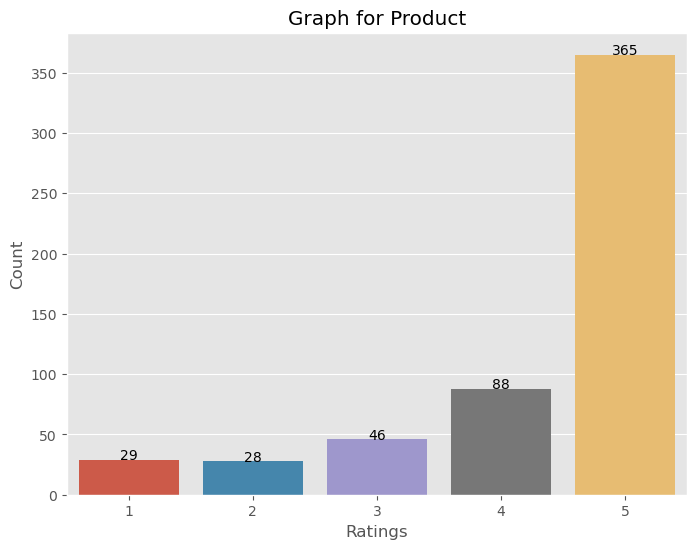

In [31]:
prodno=2
count_graph(prodno)

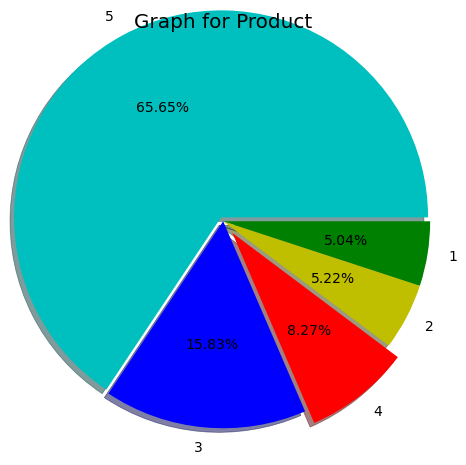

In [32]:
prodno=2
pie_graph(prodno)

In [35]:
prod_no=2
sentiment_df=sentiment_analysis(prod_no)
sentiment_df['Rounded_Generated_Rating'] = sentiment_df['Generated_Rating'].round()

In [49]:
def count_graph_for_generated_rating(prod_no):
    sentiment_df=sentiment_analysis(prod_no)
    sentiment_df['Rounded_Generated_Rating'] = sentiment_df['Generated_Rating'].round()
    count_df = sentiment_df
    plt.figure(figsize=(8, 6))
    ax=sns.countplot(x='Rounded_Generated_Rating', data=count_df,)
    # Add count annotations to each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    plt.xlabel('Ratings')
    plt.ylabel('Count')
    plt.title('Graph for Product')
    plt.show()

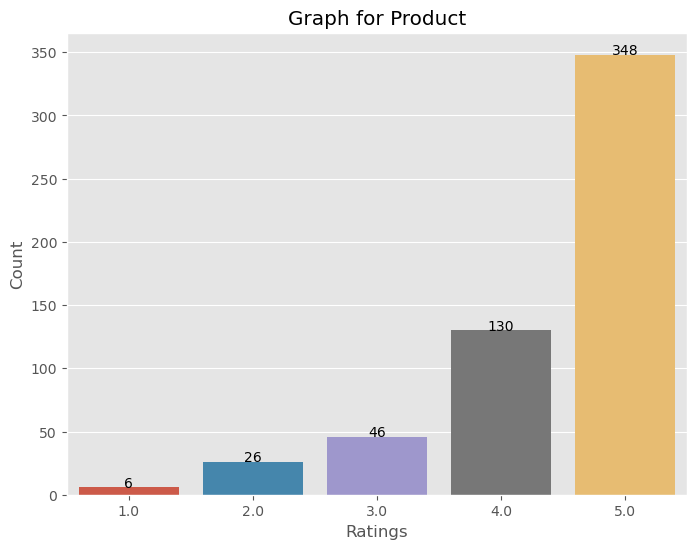

In [46]:
prod_no=2
count_graph_for_generated_rating(prod_no)

In [47]:
def pie_graph_for_generated_rating(prod_no):
    sentiment_df=sentiment_analysis(prod_no)
    sentiment_df['Rounded_Generated_Rating'] = sentiment_df['Generated_Rating'].round()
    explode = [0.03,0,0.1,0,0] # To slice the perticuler section
    colors = ["c", 'b','r','y','g'] # Color of each section
    textprops = {"fontsize":10}
    pie_df = sentiment_df
    unique_value_counts = pie_df['Rounded_Generated_Rating'].value_counts()
    unique_values = pie_df['Rounded_Generated_Rating'].unique() 
    plt.pie(unique_value_counts,labels=unique_values,explode = explode, colors =colors, autopct = "%0.2f%%",shadow = True, radius = 1.4,textprops=textprops)
    plt.title('Graph for Product')
    plt.show()

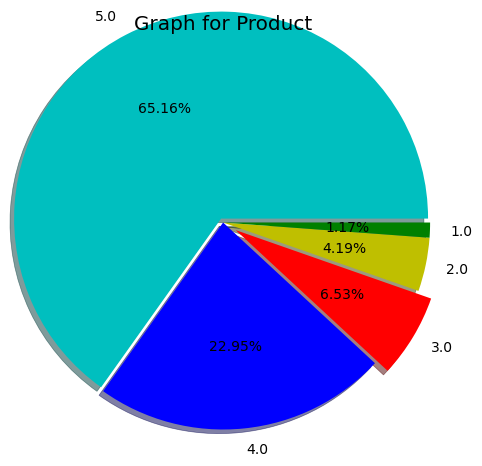

In [48]:
prod_no=1
pie_graph_for_generated_rating(prod_no)